In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\frost\Downloads\Project_youtube_analysis\video_id_info.csv",on_bad_lines="skip")

C:\Users\frost\AppData\Local\Temp\ipykernel_12036\3903738662.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\frost\Downloads\Project_youtube_analysis\video_id_info.csv",on_bad_lines="skip")


In [4]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [8]:
# Perform sentiment Analysis

In [19]:
#!pip install textblob
import sys
!{sys.executable} -m pip install textblob

In [24]:
from textblob import TextBlob

In [22]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [14]:
df.shape


(691374, 4)

In [15]:
sample_df = df[0:1000]

In [25]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️ ") # normal Text box

TextBlob("Logan Paul it's yo big day ‼️‼️‼️ ")

In [26]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️ ").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [27]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️ ").sentiment.polarity

0.0

In [28]:
#its a neutral sentence !

In [29]:
#positive sentence = 1, negative sentence = -1,neutral sentence= 0

In [33]:
# Performing sentiment for each row of comment_text'

# if there is blank text then willget the exception error so avoid the exception we have to use try exception blank 

polarity = []


for comment in df ['comment_text']:
    try:
    
        polarity.append(TextBlob(comment).sentiment.polarity)
    except: 
        polarity.append(0)

In [34]:
len(polarity)

691374

In [35]:
df["polarity"] = polarity

In [36]:
df.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


3. Wordcolud Analysis of your data 

In [38]:
filter1 = df["polarity"] ==1
#comments_positive
df[filter1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [56]:
filter2 = df["polarity"] ==-1
#comments_Negative
df[filter2]

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [57]:
#!pip install wordcloud
import sys 
!{sys.executable} -m pip install wordcloud

In [58]:
from wordcloud import WordCloud , STOPWORDS

In [59]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [60]:
df["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [61]:
type(df["comment_text"])

pandas.core.series.Series

In [62]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [63]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

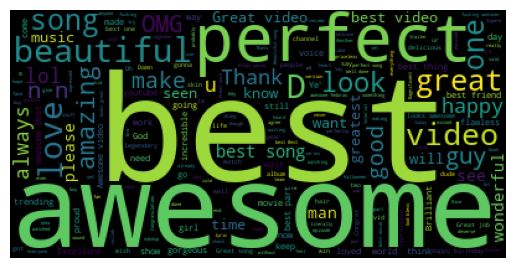

In [64]:
plt.imshow(wordcloud)
plt.axis('off')

In [65]:
# conclusion - positive Users are emphasizing more on best , awesome,perfect , amazing ,look, happy etc

# Perform Emoji's Analysis

In [76]:
#!pip install emoji==2.10.1
import sys
!{sys.executable} -m pip install emoji==2.10.1

  Obtaining dependency information for emoji==2.10.1 from https://files.pythonhosted.org/packages/98/00/00d56e704d69cee4a92b1d517676579b4af5f2f8bc72946c464a504705b2/emoji-2.10.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/421.5 kB ? eta -:--:--
    --------------------------------------- 10.2/421.5 kB ? eta -:--:--
   - ------------------------------------- 20.5/421.5 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 71.7/421.5 kB 558.5 kB/s eta 0:00:01
   ----------- -------------------------- 122.9/421.5 kB 901.1 kB/s eta 0:00:01
   ---------------- --------------------- 184.3/421.5 kB 926.0 kB/s eta 0:00:01
   ---------------------- ----------------- 235.5/421.5 kB 1.0 MB/s eta 0:00:01
   ---------------------------- ----------- 297.0/421.5 kB 1.1 MB/s eta 0:00:01
   ----------------------------------- ---- 378.9/421.5 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  419.8/421.5 kB 1.2 MB/s eta 0:00:01
   ------

In [77]:
import emoji

In [79]:
emoji.__version__

'2.10.1'

In [80]:
df['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [81]:
comment = "trending 😉"

In [82]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [83]:
emoji_list=[]


for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)
        
        
emoji_list

['😉']

In [88]:
import emoji  # Make sure you have imported the emoji library

all_emojis_list = []

for comment in df["comment_text"].dropna():
    # In case you have missing values, call dropna()
    
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)


In [89]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [90]:
from collections import Counter   # collection package

In [92]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [93]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [94]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [96]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [97]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [98]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [99]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [100]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [101]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [108]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range (10)]
freqs


[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [110]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range (10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']